In [1]:
import pennylane as qml
import pennylane.numpy as np

In [21]:
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def circuit(angles):
    """A quantum circuit made from the quantum function U.

    Args:
        angles (list(float)): A list of angles containing theta_0, theta_1, theta_2, and theta_3 in that order. 
    Returns:
        (numpy.tensor): The probability of the fourth qubit.
    """
        # Put your code here #
    qml.broadcast(qml.Hadamard,wires=range(4),pattern='single')
    qml.Barrier(wires=range(4))
    qml.RX(angles[0],wires=0)
    qml.Barrier(wires=range(4))
    qml.CNOT(wires=[0,3])
    qml.CNOT(wires=[2,1])
    qml.Barrier(wires=range(4))
    m_0,m_1=qml.measure(0),qml.measure(2)
    qml.Barrier(wires=range(4))
    qml.cond(m_0+m_1>=1,qml.U3)(angles[1],angles[2],angles[3],wires=3)
    #if m_0+m_1>=1:
      #  qml.U3(angles[1],angles[2],angles[3],wires=3)
    qml.Barrier(wires=range(4))
    qml.PauliZ(wires=3)
    return qml.probs(wires=3)



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14244\1664548886.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


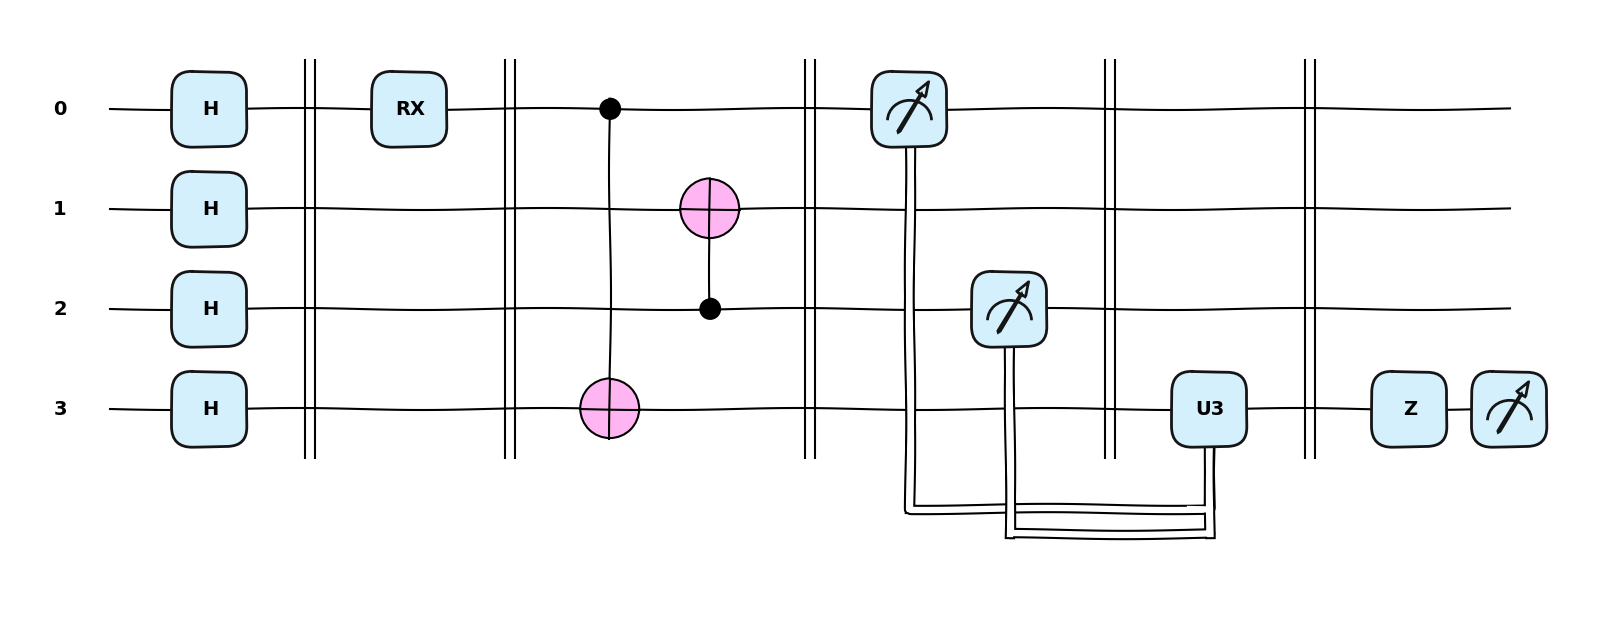

In [22]:
fig,ax = qml.draw_mpl(circuit,style='pennylane_sketch')([1.0, 1.5, 2.0, 2.5])
fig.show()

In [23]:
circuit([1.0, 1.5, 2.0, 2.5])

tensor([0.79967628, 0.20032372], requires_grad=True)